### Import Packages
Import packages needed for the notebook to function.

In [1]:
from PIL import Image
from ipywidgets import Layout
from ipywidgets import Image as IpyImage
import ipywidgets as widgets
from ipycanvas import Canvas, hold_canvas, MultiCanvas
import io, os, math
import numpy as np
import notebook

### Selecting the Input Image
Select the synchrotron X-ray tomography image to detect inclusions for.

In [2]:
notebook.select_input()

interactive(children=(FileUpload(value={}, accept='.png,.jpg,.jpeg,.tif', description='Upload'), Output()), _d…

### Image Pre-processing
Use the circle tool to cover the main part, seperating it from the background noise. Then, the image will be split up into tiles, which is more efficient for the model to make predictions on.

In [3]:
notebook.image_preprocessing()

In [4]:
notebook.create_canvas()

In [6]:
notebook.remove_bg_noise()

MultiCanvas(height=560, width=800)

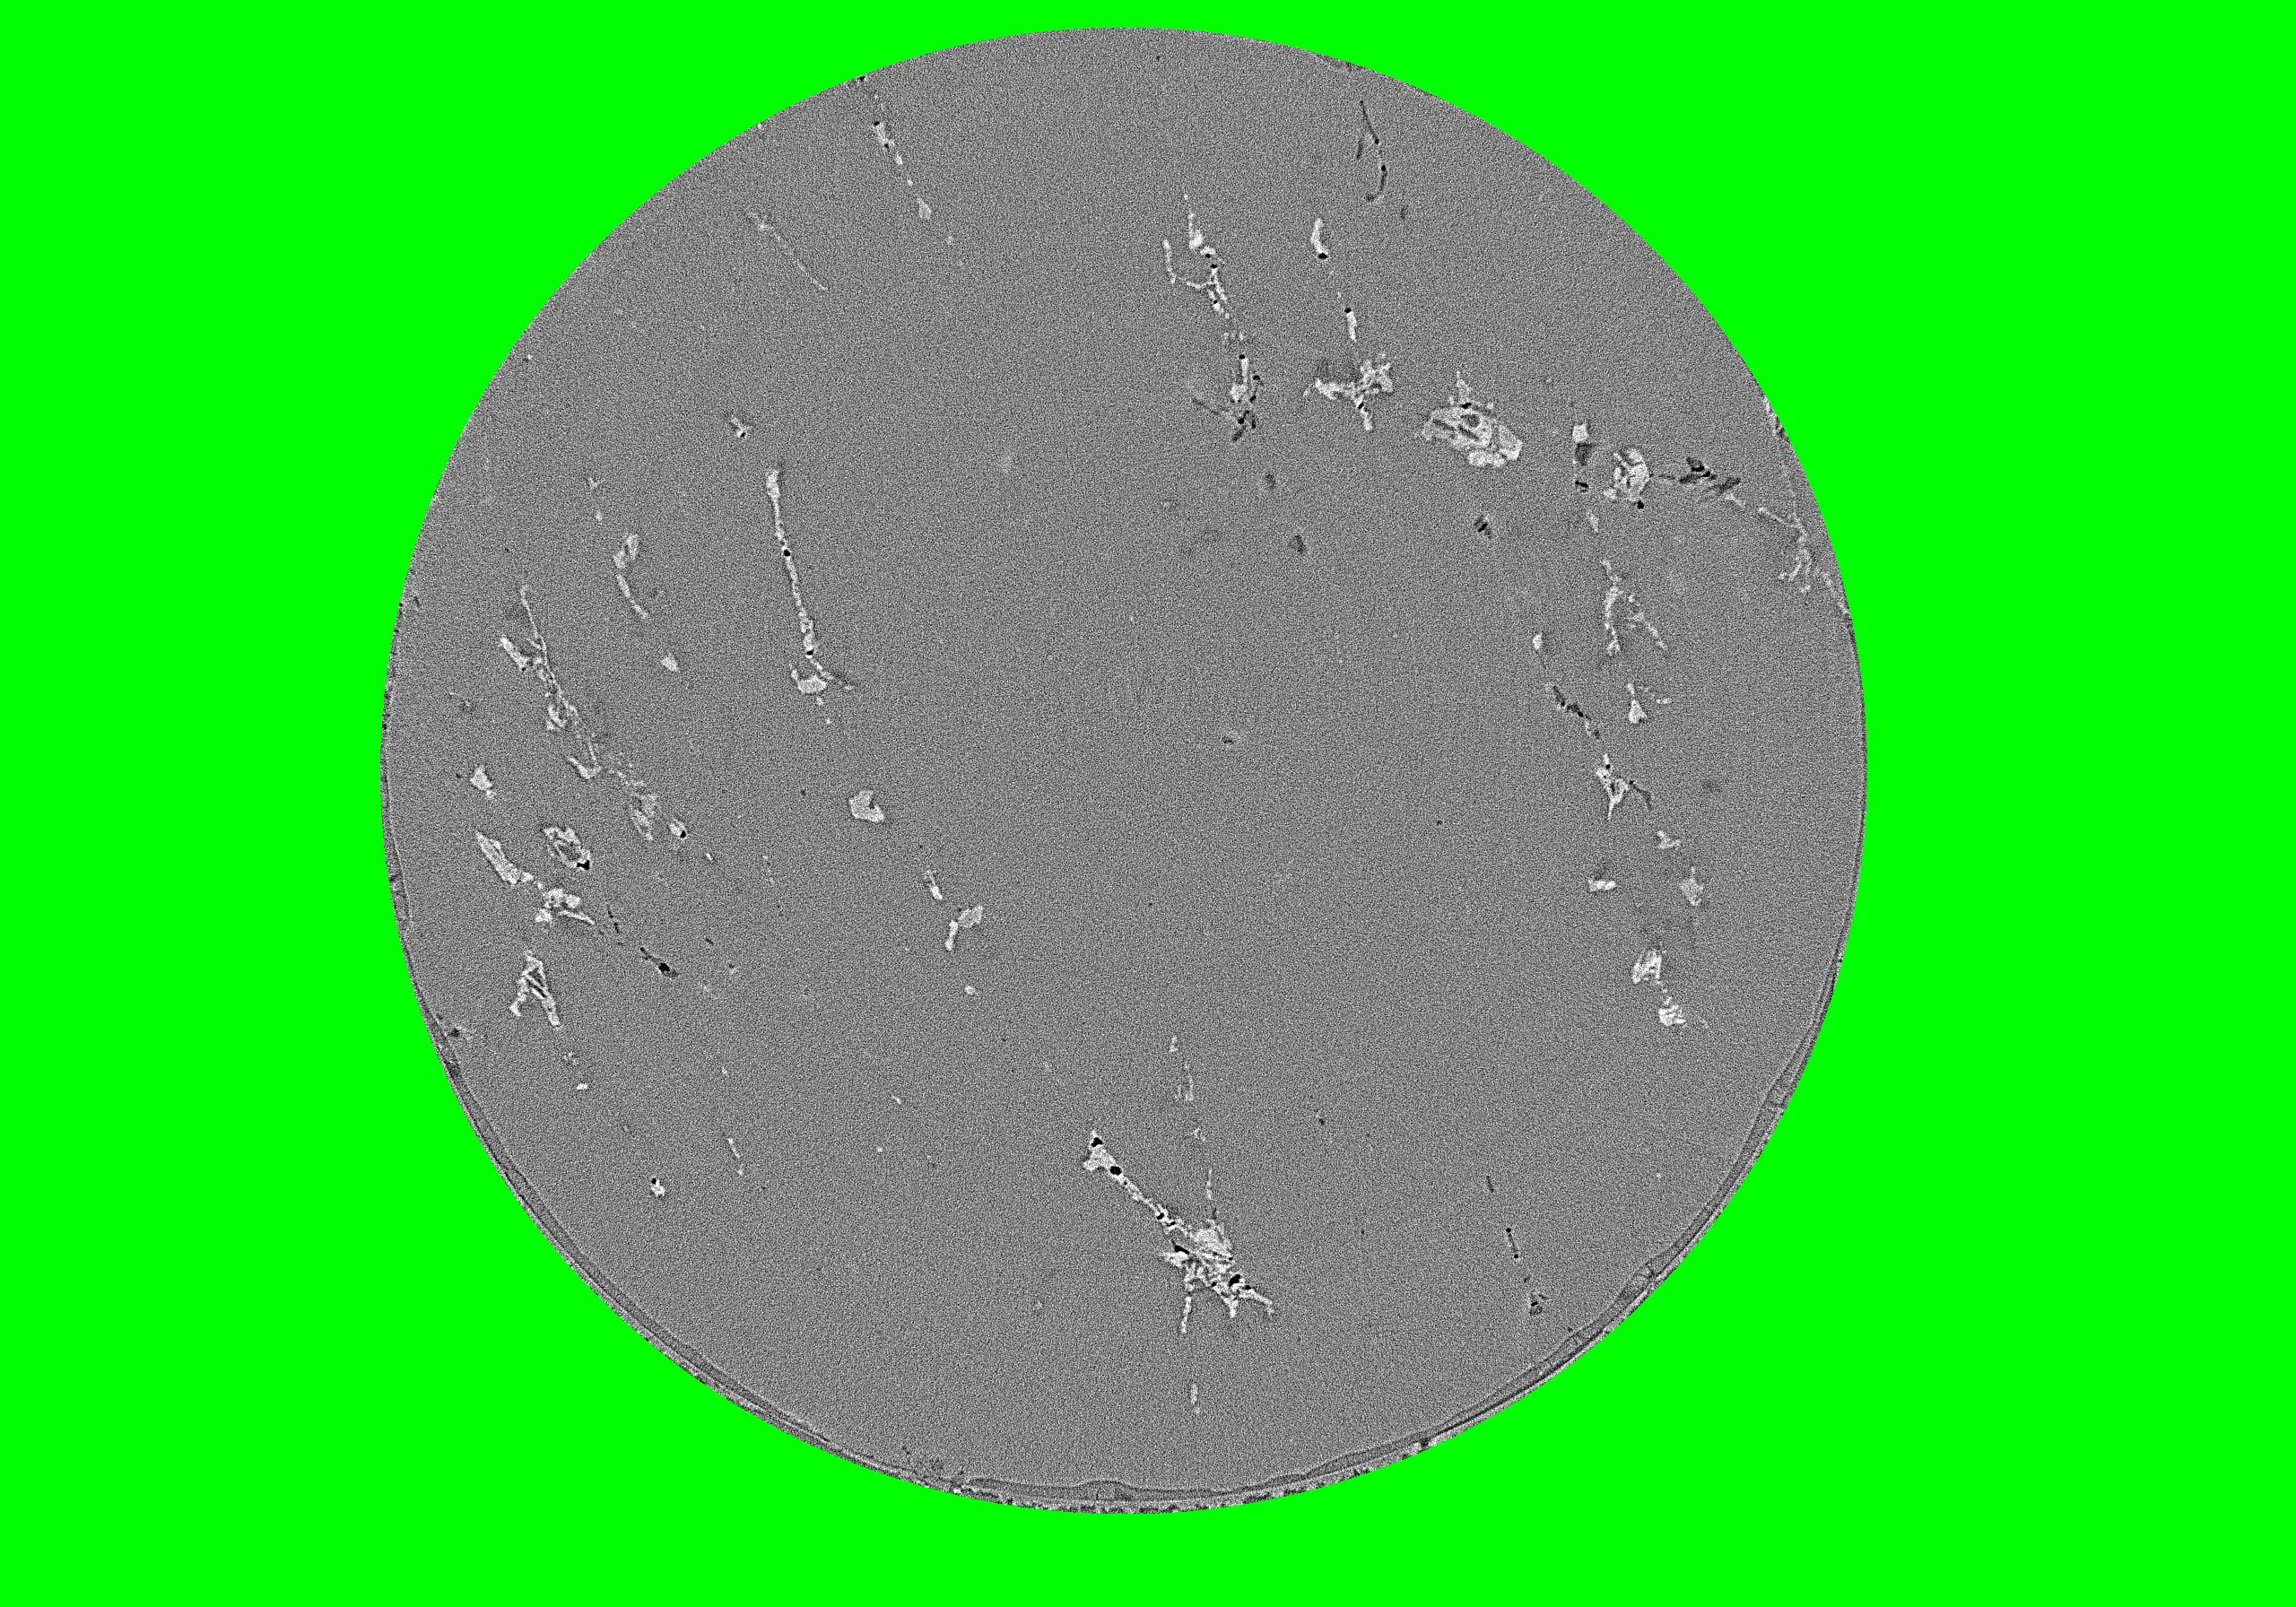

In [7]:
notebook.confirm_selection()

In [8]:
notebook.split_input()

Image was successfully split


### Predicting the Inclusions
An inclusion label mask will be predicted for each tile. There will be an output tile for each tile.

In [9]:
# Predicts the label mask on each tile
model_file = 'checkpoints/best_test_NoWei_BatchSize8_Epoch_40.pth'
dataset_dir = 'data/test_data/'
%run -i predict.py -m {model_file} -dir {dataset_dir}

### Resulting Label Mask
Each of the inclusion label mask tiles are concatenated and the final inclusion image is shown.

In [10]:
notebook.result_mask()

In [11]:
notebook.display_result()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Opacity:', max=1.0, step=0.…

### Correcting Label Mask
If any of the inclusions are missed, you can use the tool below to help correct the model.

In [12]:
notebook.create_correction_canvas()

In [13]:
notebook.display_correction_canvas()

RadioButtons(description='Type:', options=('Draw: Missing Fe (Red)', 'Draw: Missing Mg (Orange)', 'Draw: Incor…

MultiCanvas(height=896, width=1280)

In [14]:
notebook.convert_correction_canvas()

Image was converted into numpy array
